In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [2]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [3]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [4]:
%matplotlib notebook

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
ll = likelihood_analyser.LikelihoodAnalyser()

In [ ]:
m1_all = []

# def func3(i):
for i in range(0, 10000):
    print(i,'  ******************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking378/Shaking3_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    fit_kwargs = {'A': 0, 'phi': 0.2, 'sigma':13.85,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1, 'error_sigma': 10,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000], 'limit_sigma': [0, 1000000],
              'print_level': 0, 'fix_A': False, 'fix_phi': True, 'fix_sigma': False}

    mm_tmp2 = ll.find_mle_sin()
#     return mm_tmp2[0]
    m1_all.append(mm_tmp2[2])

In [14]:
bdfs = load_dir(dirname=r'/data/new_trap/20200512/Bead1/Discharge/', start_file=310)

643  files in folder
333  files loaded


In [15]:
dis_z = [np.std(bb.response_at_freq2('z',drive_freq=71)) for bb in bdfs]

In [16]:
m1 = gfw.build_z_response(bdfs, drive_freq=71, charges=10, bandwidth=1, decimate=10, bimodal=True)

***************************************************
Z2-amplitude:  7.33e+00
reduced chi2:  193.4514896665765
***************************************************
Z2-amplitude:  2.68e+02
reduced chi2:  154.45781392944986
***************************************************
Z2-amplitude:  2.56e+02
reduced chi2:  262.1392382684974
***************************************************
Z2-amplitude:  2.61e+02
reduced chi2:  261.16422180086107
***************************************************
Z2-amplitude:  2.79e+02
reduced chi2:  132.61315241337059
***************************************************
Z2-amplitude:  2.45e+02
reduced chi2:  106.77712420675333
***************************************************
Z2-amplitude:  2.70e+02
reduced chi2:  295.6464776397365
***************************************************
Z2-amplitude:  2.42e+02
reduced chi2:  315.44603752939264
***************************************************
Z2-amplitude:  2.58e+02
reduced chi2:  230.16073347328367
*************

***************************************************
Z2-amplitude:  1.89e+02
reduced chi2:  66.43003109069602
***************************************************
Z2-amplitude:  1.82e+02
reduced chi2:  69.43615599921682
***************************************************
Z2-amplitude:  1.80e+02
reduced chi2:  186.3420949989691
***************************************************
Z2-amplitude:  1.81e+02
reduced chi2:  204.12095206468305
***************************************************
Z2-amplitude:  1.78e+02
reduced chi2:  243.79750329933808
***************************************************
Z2-amplitude:  1.88e+02
reduced chi2:  163.51258493923146
***************************************************
Z2-amplitude:  1.86e+02
reduced chi2:  173.85564301172275
***************************************************
Z2-amplitude:  2.06e+02
reduced chi2:  136.30500662933238
***************************************************
Z2-amplitude:  2.02e+02
reduced chi2:  91.41173517037154
**************

***************************************************
Z2-amplitude:  1.89e+02
reduced chi2:  103.39675498738767
***************************************************
Z2-amplitude:  1.96e+02
reduced chi2:  137.71080652141987
***************************************************
Z2-amplitude:  1.86e+02
reduced chi2:  311.0815622990997
***************************************************
Z2-amplitude:  1.98e+02
reduced chi2:  176.84066817685434
***************************************************
Z2-amplitude:  1.96e+02
reduced chi2:  91.60599506520634
***************************************************
Z2-amplitude:  1.33e+02
reduced chi2:  114.98410989870635
***************************************************
Z2-amplitude:  1.30e+02
reduced chi2:  139.97256402338624
***************************************************
Z2-amplitude:  1.31e+02
reduced chi2:  137.66930413398805
***************************************************
Z2-amplitude:  1.28e+02
reduced chi2:  99.72043502744357
*************

***************************************************
Z2-amplitude:  1.51e+00
reduced chi2:  113.82257069338907
***************************************************
Z2-amplitude:  3.89e+00
reduced chi2:  217.73082654421071
***************************************************
Z2-amplitude:  1.13e+01
reduced chi2:  120.08403302289317
***************************************************
Z2-amplitude:  1.17e+01
reduced chi2:  84.86871836269027
***************************************************
Z2-amplitude:  8.24e-01
reduced chi2:  102.71833764033141
***************************************************
Z2-amplitude:  1.47e+01
reduced chi2:  183.84948375942454
***************************************************
Z2-amplitude:  3.69e-01
reduced chi2:  105.80810948462388
***************************************************
Z2-amplitude:  1.21e+01
reduced chi2:  127.4818612534583
***************************************************
Z2-amplitude:  6.82e+01
reduced chi2:  215.12988495647866
************

***************************************************
Z2-amplitude:  3.05e+02
reduced chi2:  1276.4572141826684
***************************************************
Z2-amplitude:  3.13e+02
reduced chi2:  1534.793421608837
***************************************************
Z2-amplitude:  1.95e+02
reduced chi2:  728.9660892174827
***************************************************
Z2-amplitude:  9.11e+01
reduced chi2:  322.7826796273314
***************************************************
Z2-amplitude:  4.07e+00
reduced chi2:  426.5773091294573
***************************************************
Z2-amplitude:  7.68e+01
reduced chi2:  426.416624645755
***************************************************
Z2-amplitude:  8.63e+01
reduced chi2:  1184.554353824408
***************************************************
Z2-amplitude:  2.01e+02
reduced chi2:  748.9313764685072
***************************************************
Z2-amplitude:  2.41e+02
reduced chi2:  463.8913369679735
*******************

In [37]:
phases_bimodal = [m_.values[4] for m_ in m1]
amps_bimodal = np.array([m_.values[0] for m_ in m1])
phases_bimodal[-10:]

[1.7107987239098037,
 1.7108021673242417,
 1.1492883978666892,
 1.3866765791632263,
 1.7107950844918127,
 2.0607615393079026,
 1.710795116647728,
 1.7107949617702243,
 1.71079490782311,
 1.5355897029508228]

<IPython.core.display.Javascript object>


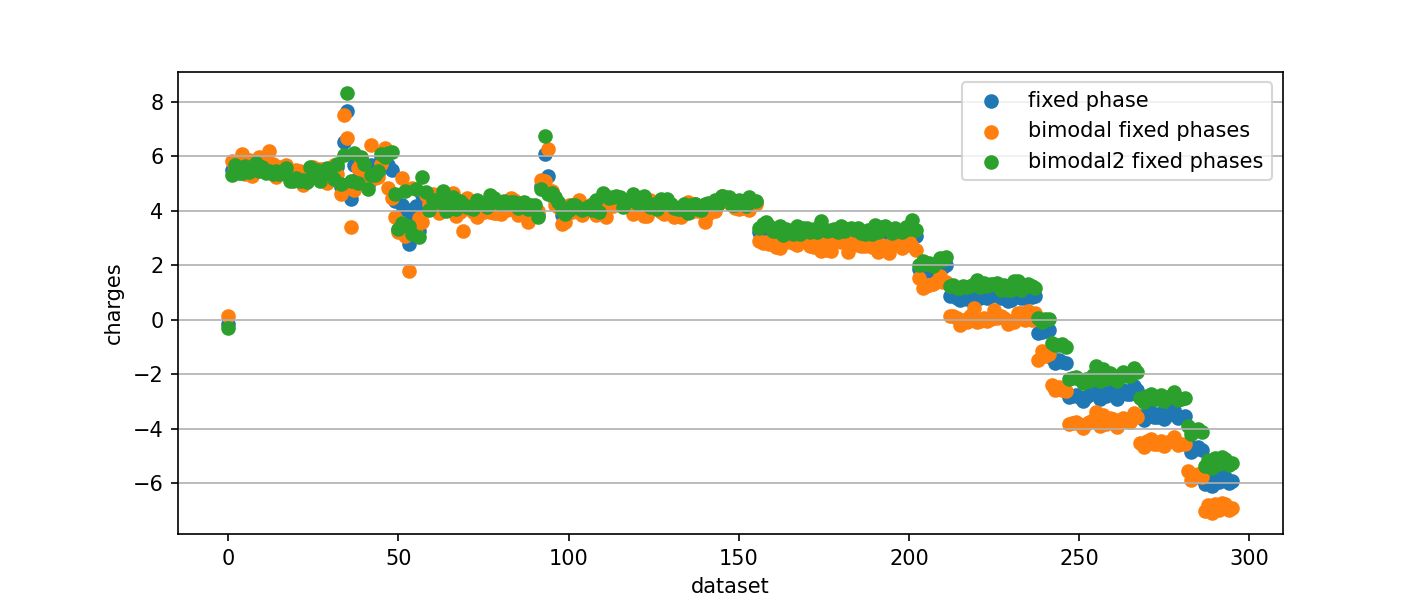

In [90]:
# phases = np.array([m_.values[2] for m_ in m1])
# amps = np.array([m_.values[0] for m_ in m1])
amps3 = np.array([m_.values[0] for m_ in m1])

_,ax = plt.subplots(figsize=(9.5,4))
scale = 45.85
extra_scale = 1

# ax.scatter(range(len(dis_z)), amps/scale/extra_scale, label='fixed phase')
ax.scatter(range(len(dis_z)), amps1/scale/extra_scale, label='fixed phase')
# ax.scatter(range(len(dis_z)), amps2/scale/extra_scale, label='bimodal fixed phases')
ax.scatter(range(len(dis_z)), amps3/scale/extra_scale, label='bimodal fixed phases')
ax.scatter(range(len(dis_z)), amps4/scale/extra_scale, label='bimodal2 fixed phases')

ax.legend()
ax.set(xlabel='dataset', ylabel='charges', ylim=(None,None), xlim=(None,None))
ax.grid(axis='y')
ax.legend()
from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

In [91]:
bdf_z = bdfs[100:110]

freq = bdf_z[0].psd2('z')[0]
z_scale = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale += bb.psd2('z')[1][freq==71]
z_scale /= len(bdf_z)

charges = 4
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale = force/np.sqrt(z_scale)

In [106]:
fname = r'/data/new_trap/20200512/Bead1/InitialTest/Data58.h5'
data_bdfs = BeadDataFile.BeadDataFile(fname=fname)
freq = data_bdfs.psd2('z')[0]
fftz1 = data_bdfs.psd2('z')[1]
# for i in range(1,100):
#     fftz1 += data_bdfs[i].psd2('z')[1]
# fftz1/=100

No height data
No electrodes data
No cantilever data
No laser power data


<IPython.core.display.Javascript object>


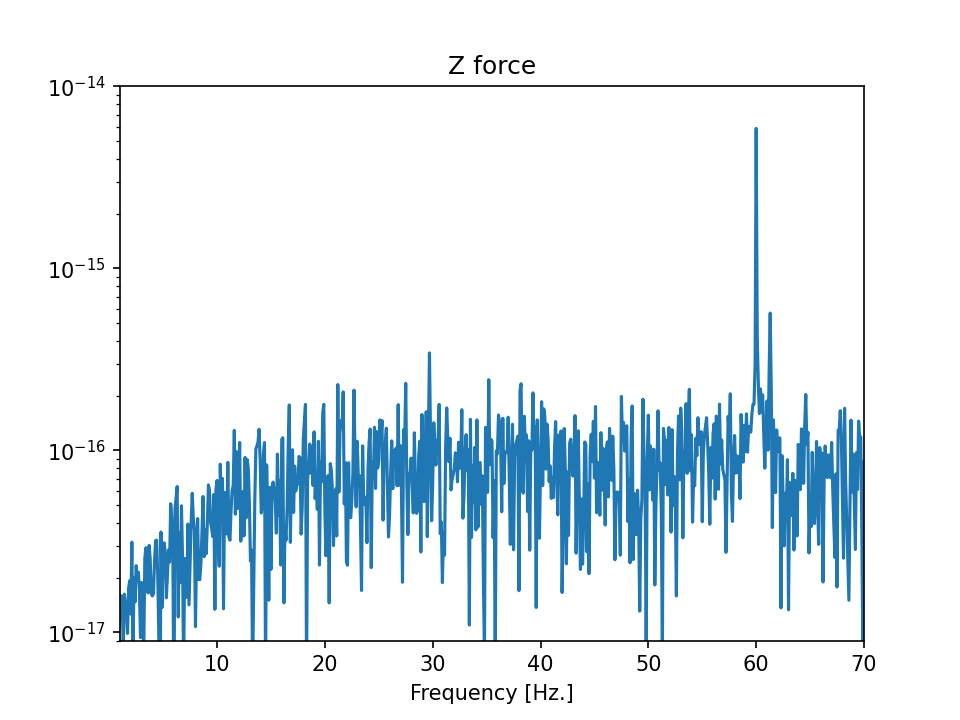

[3.03349904e-17]


In [110]:
_,ax = plt.subplots()
ax.semilogy(freq, np.sqrt(fftz1)*z_scale)
_ = ax.set(xlim=(1,70),  ylim=(9e-18,1e-14), xlabel='Frequency [Hz.]', title=r'Z force')
print(np.sqrt(fftz1[freq==36])*z_scale/np.sqrt(10))

### Background model

In [7]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/New_Discharge/',
                         start_file=0, max_file=1000)

No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
No laser power data
15  files in folder
15  files loaded


In [8]:
bdf_z = bdf_discharge[:5]
bdf_x = bdf_discharge[5:10]
bdf_y = bdf_discharge[10:]

freq = bdf_z[0].psd2('z')[0]
z_scale = bdf_z[0].psd2('z')[1][freq==71]
for bb in bdf_z:
    z_scale += bb.psd2('z')[1][freq==71]
z_scale /= len(bdf_z)

x_scale = bdf_x[0].psd2('x')[1][freq==71]
for bb in bdf_x:
    x_scale += bb.psd2('x')[1][freq==71]
x_scale /= len(bdf_x)

y_scale = bdf_y[0].psd2('y')[1][freq==71]
for bb in bdf_y:
    y_scale += bb.psd2('y')[1][freq==71]
y_scale /= len(bdf_y)

charges = 7
force = charges * 1.6e-19 * 20 / 8.6e-3 * 0.63 * np.sqrt(10) # in Newtons/sqrt(Hz)
z_scale = force/np.sqrt(z_scale)
x_scale = force/np.sqrt(x_scale)
y_scale = force/np.sqrt(y_scale)

In [26]:
## 100 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200320/Bead1/Shaking/Shaking376/',
                         file_prefix='Shaking1_', start_file=0, max_file=1)

    
freq = data_bdfs[0].psd2('x')[0]
fftx1 = data_bdfs[0].psd2('x')[1]
ffty1 = data_bdfs[0].psd2('y')[1]
fftz1 = data_bdfs[0].psd2('z')[1]

for i in range(1,500):
    std_freqs_tmp = []
    print(i, '**************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking376/Shaking1_'+str(i)+'.h5'
#     fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/NoShaking_1_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)

    fftx1 += bb.psd2('x')[1]
    fftz1 += bb.psd2('z')[1]
    ffty1 += bb.psd2('y')[1]

fftx1/=500
ffty1/=500
fftz1/=500

500  files in folder
1  files loaded
1 **************
2 **************
3 **************
4 **************
5 **************
6 **************
7 **************
8 **************
9 **************
10 **************
11 **************
12 **************
13 **************
14 **************
15 **************
16 **************
17 **************
18 **************
19 **************
20 **************
21 **************
22 **************
23 **************
24 **************
25 **************
26 **************
27 **************
28 **************
29 **************
30 **************
31 **************
32 **************
33 **************
34 **************
35 **************
36 **************
37 **************
38 **************
39 **************
40 **************
41 **************
42 **************
43 **************
44 **************
45 **************
46 **************
47 **************
48 **************
49 **************
50 **************
51 **************
52 **************
53 **************
54 **************


438 **************
439 **************
440 **************
441 **************
442 **************
443 **************
444 **************
445 **************
446 **************
447 **************
448 **************
449 **************
450 **************
451 **************
452 **************
453 **************
454 **************
455 **************
456 **************
457 **************
458 **************
459 **************
460 **************
461 **************
462 **************
463 **************
464 **************
465 **************
466 **************
467 **************
468 **************
469 **************
470 **************
471 **************
472 **************
473 **************
474 **************
475 **************
476 **************
477 **************
478 **************
479 **************
480 **************
481 **************
482 **************
483 **************
484 **************
485 **************
486 **************
487 **************
488 **************
489 **************
490 ********

In [28]:
fftxNo2 = fftx1
fftzNo2 = fftz1

<IPython.core.display.Javascript object>


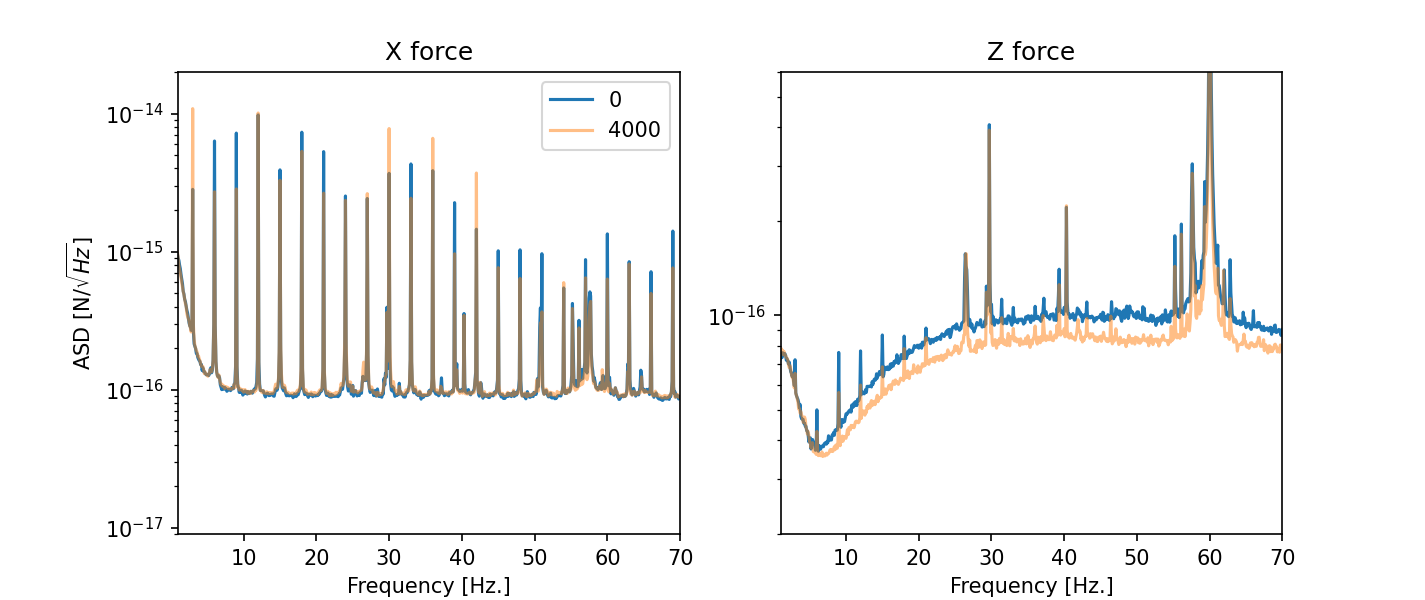

In [40]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(freq, np.sqrt(fftx0)*x_scale, label='0')
# ax[0].semilogy(freq, np.sqrt(fftx300)*x_scale, alpha=0.6, label='300')
ax[0].semilogy(freq, np.sqrt(fftx4000)*x_scale, alpha=0.5, label='4000')
# ax[0].semilogy(freq, np.sqrt(fftxNo2)*x_scale, alpha=0.3, label='No')
ax[1].semilogy(freq, np.sqrt(fftz0)*z_scale, label='0')
# ax[1].semilogy(freq, np.sqrt(fftz300)*z_scale, label='300')
ax[1].semilogy(freq, np.sqrt(fftz4000)*z_scale, alpha=0.5, label='4000')
# ax[1].semilogy(freq, np.sqrt(fftz0)*z_scale-np.sqrt(fftzNo)*z_scale, label='4000')
# ax[1].semilogy(freq, np.sqrt(fftzNo2)*z_scale*0.95, alpha=0.9, label='No')
ax[0].legend()
ax[0].set(xlim=(1,70), ylim=(9e-18,2e-14), xlabel='Frequency [Hz.]', ylabel=r'ASD [N/$\sqrt{Hz}$]', title='X force')
_ = ax[1].set(xlim=(1,70), ylim=(2e-17,6e-16), xlabel='Frequency [Hz.]', title=r'Z force')
# _ = ax[1].set(xlim=(1,70), ylim=(1e-19,None), xlabel='Frequency [Hz.]', title=r'Z force')
# print(np.sqrt(fftx1[freq==36])*x_scale/np.sqrt(10), np.sqrt(fftz1[freq==36])*z_scale/np.sqrt(10))

In [10]:
gravity_freqs = 3*np.array([2,3,4,5,6,7,8,9,10,11,12,13])

In [116]:
phases_freqs_z_373 = []
ffts_freqs_z_373 = []

phases_freqs_x_373 = []
ffts_freqs_x_373 = []

for i in range(5000):
    std_freqs_tmp = []
    print(i, '**************')
    fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking373/Shaking4_'+str(i)+'.h5'
#     fname = r'/data/new_trap/20200320/Bead1/Shaking/Shaking2_20200403/NoShaking_1_'+str(i)+'.h5'
    bb = BeadDataFile.BeadDataFile(fname=fname)
    freq = np.fft.rfftfreq(len(bb.z2), 1 / 5000)

    angles_tmp = (np.angle(np.fft.rfft(bb.z2)) + np.pi / 2) % (2 * np.pi)
    angles_tmp_x = (np.angle(np.fft.rfft(bb.x2)) + np.pi / 2) % (2 * np.pi)
    
    phases_freqs_tmp = np.array([angles_tmp[freq == freq_] for freq_ in gravity_freqs])
    phases_freqs_tmp_x = np.array([angles_tmp_x[freq == freq_] for freq_ in gravity_freqs])
    
        
    fft_tmp = bb.psd2('z')[1]
    fft_tmp_x = bb.psd2('x')[1]
    
    ffts_freqs_tmp = np.array([fft_tmp[freq == freq_] for freq_ in gravity_freqs])
    ffts_freqs_tmp_x = np.array([fft_tmp_x[freq == freq_] for freq_ in gravity_freqs])
    
    phases_freqs_z_373.append(phases_freqs_tmp)
    ffts_freqs_z_373.append(ffts_freqs_tmp)
    
    phases_freqs_x_373.append(phases_freqs_tmp_x)
    ffts_freqs_x_373.append(ffts_freqs_tmp_x)
    
phases_freqs_z_373 = np.array(phases_freqs_z_373)
ffts_freqs_z_373 = np.array(ffts_freqs_z_373)

phases_freqs_x_373 = np.array(phases_freqs_x_373)
ffts_freqs_x_373 = np.array(ffts_freqs_x_373)

0 **************
1 **************
2 **************
3 **************
4 **************
5 **************
6 **************
7 **************
8 **************
9 **************
10 **************
11 **************
12 **************
13 **************
14 **************
15 **************
16 **************
17 **************
18 **************
19 **************
20 **************
21 **************
22 **************
23 **************
24 **************
25 **************
26 **************
27 **************
28 **************
29 **************
30 **************
31 **************
32 **************
33 **************
34 **************
35 **************
36 **************
37 **************
38 **************
39 **************
40 **************
41 **************
42 **************
43 **************
44 **************
45 **************
46 **************
47 **************
48 **************
49 **************
50 **************
51 **************
52 **************
53 **************
54 **************
55 **************
56

438 **************
439 **************
440 **************
441 **************
442 **************
443 **************
444 **************
445 **************
446 **************
447 **************
448 **************
449 **************
450 **************
451 **************
452 **************
453 **************
454 **************
455 **************
456 **************
457 **************
458 **************
459 **************
460 **************
461 **************
462 **************
463 **************
464 **************
465 **************
466 **************
467 **************
468 **************
469 **************
470 **************
471 **************
472 **************
473 **************
474 **************
475 **************
476 **************
477 **************
478 **************
479 **************
480 **************
481 **************
482 **************
483 **************
484 **************
485 **************
486 **************
487 **************
488 **************
489 **************
490 ********

882 **************
883 **************
884 **************
885 **************
886 **************
887 **************
888 **************
889 **************
890 **************
891 **************
892 **************
893 **************
894 **************
895 **************
896 **************
897 **************
898 **************
899 **************
900 **************
901 **************
902 **************
903 **************
904 **************
905 **************
906 **************
907 **************
908 **************
909 **************
910 **************
911 **************
912 **************
913 **************
914 **************
915 **************
916 **************
917 **************
918 **************
919 **************
920 **************
921 **************
922 **************
923 **************
924 **************
925 **************
926 **************
927 **************
928 **************
929 **************
930 **************
931 **************
932 **************
933 **************
934 ********

1307 **************
1308 **************
1309 **************
1310 **************
1311 **************
1312 **************
1313 **************
1314 **************
1315 **************
1316 **************
1317 **************
1318 **************
1319 **************
1320 **************
1321 **************
1322 **************
1323 **************
1324 **************
1325 **************
1326 **************
1327 **************
1328 **************
1329 **************
1330 **************
1331 **************
1332 **************
1333 **************
1334 **************
1335 **************
1336 **************
1337 **************
1338 **************
1339 **************
1340 **************
1341 **************
1342 **************
1343 **************
1344 **************
1345 **************
1346 **************
1347 **************
1348 **************
1349 **************
1350 **************
1351 **************
1352 **************
1353 **************
1354 **************
1355 **************
1356 **************


1729 **************
1730 **************
1731 **************
1732 **************
1733 **************
1734 **************
1735 **************
1736 **************
1737 **************
1738 **************
1739 **************
1740 **************
1741 **************
1742 **************
1743 **************
1744 **************
1745 **************
1746 **************
1747 **************
1748 **************
1749 **************
1750 **************
1751 **************
1752 **************
1753 **************
1754 **************
1755 **************
1756 **************
1757 **************
1758 **************
1759 **************
1760 **************
1761 **************
1762 **************
1763 **************
1764 **************
1765 **************
1766 **************
1767 **************
1768 **************
1769 **************
1770 **************
1771 **************
1772 **************
1773 **************
1774 **************
1775 **************
1776 **************
1777 **************
1778 **************


2146 **************
2147 **************
2148 **************
2149 **************
2150 **************
2151 **************
2152 **************
2153 **************
2154 **************
2155 **************
2156 **************
2157 **************
2158 **************
2159 **************
2160 **************
2161 **************
2162 **************
2163 **************
2164 **************
2165 **************
2166 **************
2167 **************
2168 **************
2169 **************
2170 **************
2171 **************
2172 **************
2173 **************
2174 **************
2175 **************
2176 **************
2177 **************
2178 **************
2179 **************
2180 **************
2181 **************
2182 **************
2183 **************
2184 **************
2185 **************
2186 **************
2187 **************
2188 **************
2189 **************
2190 **************
2191 **************
2192 **************
2193 **************
2194 **************
2195 **************


2569 **************
2570 **************
2571 **************
2572 **************
2573 **************
2574 **************
2575 **************
2576 **************
2577 **************
2578 **************
2579 **************
2580 **************
2581 **************
2582 **************
2583 **************
2584 **************
2585 **************
2586 **************
2587 **************
2588 **************
2589 **************
2590 **************
2591 **************
2592 **************
2593 **************
2594 **************
2595 **************
2596 **************
2597 **************
2598 **************
2599 **************
2600 **************
2601 **************
2602 **************
2603 **************
2604 **************
2605 **************
2606 **************
2607 **************
2608 **************
2609 **************
2610 **************
2611 **************
2612 **************
2613 **************
2614 **************
2615 **************
2616 **************
2617 **************
2618 **************


2993 **************
2994 **************
2995 **************
2996 **************
2997 **************
2998 **************
2999 **************
3000 **************
3001 **************
3002 **************
3003 **************
3004 **************
3005 **************
3006 **************
3007 **************
3008 **************
3009 **************
3010 **************
3011 **************
3012 **************
3013 **************
3014 **************
3015 **************
3016 **************
3017 **************
3018 **************
3019 **************
3020 **************
3021 **************
3022 **************
3023 **************
3024 **************
3025 **************
3026 **************
3027 **************
3028 **************
3029 **************
3030 **************
3031 **************
3032 **************
3033 **************
3034 **************
3035 **************
3036 **************
3037 **************
3038 **************
3039 **************
3040 **************
3041 **************
3042 **************


3418 **************
3419 **************
3420 **************
3421 **************
3422 **************
3423 **************
3424 **************
3425 **************
3426 **************
3427 **************
3428 **************
3429 **************
3430 **************
3431 **************
3432 **************
3433 **************
3434 **************
3435 **************
3436 **************
3437 **************
3438 **************
3439 **************
3440 **************
3441 **************
3442 **************
3443 **************
3444 **************
3445 **************
3446 **************
3447 **************
3448 **************
3449 **************
3450 **************
3451 **************
3452 **************
3453 **************
3454 **************
3455 **************
3456 **************
3457 **************
3458 **************
3459 **************
3460 **************
3461 **************
3462 **************
3463 **************
3464 **************
3465 **************
3466 **************
3467 **************


3839 **************
3840 **************
3841 **************
3842 **************
3843 **************
3844 **************
3845 **************
3846 **************
3847 **************
3848 **************
3849 **************
3850 **************
3851 **************
3852 **************
3853 **************
3854 **************
3855 **************
3856 **************
3857 **************
3858 **************
3859 **************
3860 **************
3861 **************
3862 **************
3863 **************
3864 **************
3865 **************
3866 **************
3867 **************
3868 **************
3869 **************
3870 **************
3871 **************
3872 **************
3873 **************
3874 **************
3875 **************
3876 **************
3877 **************
3878 **************
3879 **************
3880 **************
3881 **************
3882 **************
3883 **************
3884 **************
3885 **************
3886 **************
3887 **************
3888 **************


4264 **************
4265 **************
4266 **************
4267 **************
4268 **************
4269 **************
4270 **************
4271 **************
4272 **************
4273 **************
4274 **************
4275 **************
4276 **************
4277 **************
4278 **************
4279 **************
4280 **************
4281 **************
4282 **************
4283 **************
4284 **************
4285 **************
4286 **************
4287 **************
4288 **************
4289 **************
4290 **************
4291 **************
4292 **************
4293 **************
4294 **************
4295 **************
4296 **************
4297 **************
4298 **************
4299 **************
4300 **************
4301 **************
4302 **************
4303 **************
4304 **************
4305 **************
4306 **************
4307 **************
4308 **************
4309 **************
4310 **************
4311 **************
4312 **************
4313 **************


4688 **************
4689 **************
4690 **************
4691 **************
4692 **************
4693 **************
4694 **************
4695 **************
4696 **************
4697 **************
4698 **************
4699 **************
4700 **************
4701 **************
4702 **************
4703 **************
4704 **************
4705 **************
4706 **************
4707 **************
4708 **************
4709 **************
4710 **************
4711 **************
4712 **************
4713 **************
4714 **************
4715 **************
4716 **************
4717 **************
4718 **************
4719 **************
4720 **************
4721 **************
4722 **************
4723 **************
4724 **************
4725 **************
4726 **************
4727 **************
4728 **************
4729 **************
4730 **************
4731 **************
4732 **************
4733 **************
4734 **************
4735 **************
4736 **************
4737 **************


<IPython.core.display.Javascript object>


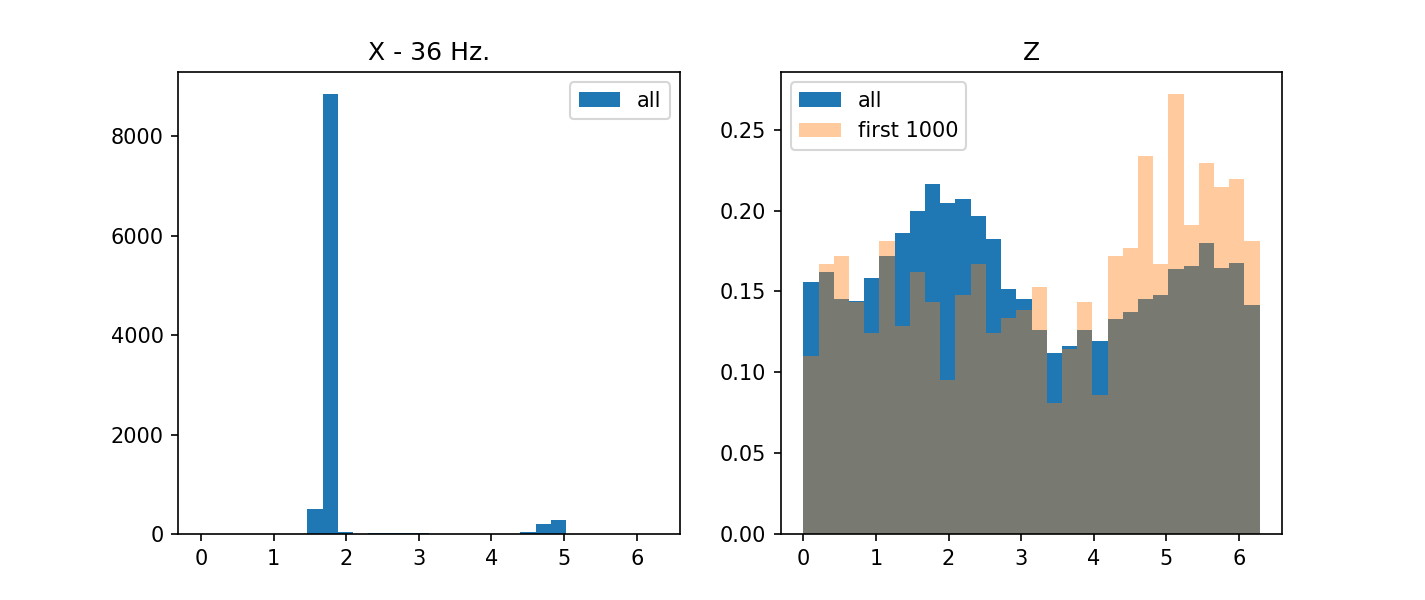

[Text(0.5, 1.0, 'Z')]

In [45]:
i=10
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].hist(phases_freqs_x[:,i,0], range=(0,2*np.pi), bins=30, label='all')
# ax[0].hist(phases_freqs_x_0[:,i,0], bins=30, label='0', range=(0,2*np.pi), alpha=0.5)
# ax[0].hist(phases_freqs_x_300[:,i,0], bins=30, label='300', range=(0,2*np.pi), alpha=0.3)
ax[1].hist(phases_freqs_z[:,i,0], bins=30, range=(0,2*np.pi), label='all', density=True)
ax[1].hist(phases_freqs_z[:1000,i,0], bins=30, range=(0,2*np.pi), label='first 1000', density=True, alpha=0.4)
# ax[1].hist(phases_freqs_z_0[:,i,0], bins=30, label='0', range=(0,2*np.pi) , alpha=0.5)
# ax[1].hist(phases_freqs_z_300[:,i,0], bins=30, label='300', range=(0,2*np.pi) , alpha=0.3)
ax[0].legend()
ax[1].legend()
ax[0].set(title='X - '+str(gravity_freqs[i])+' Hz.')
ax[1].set(title='Z')

In [37]:
gravity_freqs[j], gravity_freqs

NameError: name 'j' is not defined

In [117]:
vec = ffts_freqs_z_373[:,:,0]
fft_mean_373 = np.array([np.mean(vec[i*100:(i+1)*100], axis=0) for i in range(50)])
vec = ffts_freqs_x_373[:,:,0]
fft_mean_x_373 = np.array([np.mean(vec[i*100:(i+1)*100], axis=0) for i in range(50)])

In [118]:
fft_mean_x2_373 = np.sqrt(np.abs(fft_mean_x_373))*x_scale
fft_mean_z2_373 = np.sqrt(np.abs(fft_mean_373))*z_scale
fft_mean_x2_373.shape

(50, 12)

In [44]:
j = 10
# vec = ffts_freqs_z[:,j,0]
# fft_mean = np.array([np.mean(vec[i*100:(i+1)*100]) for i in range(100)])

vec = np.abs(ffts_freqs_x[:,j,0])
fft_mean_x = np.array([np.mean(vec[i*100:(i+1)*100]) for i in range(100)])

# vec = np.abs(ffts_freqs_z[:,j-1,0])
# fft_mean_x2 = np.array([np.mean(vec[i*100:(i+1)*100]) for i in range(100)])

vec = phases_freqs_x[:,j,0]
phase_mean = [np.mean(vec[i*100:(i+1)*100]) for i in range(100)]
phase_std = [np.std(vec[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

<IPython.core.display.Javascript object>


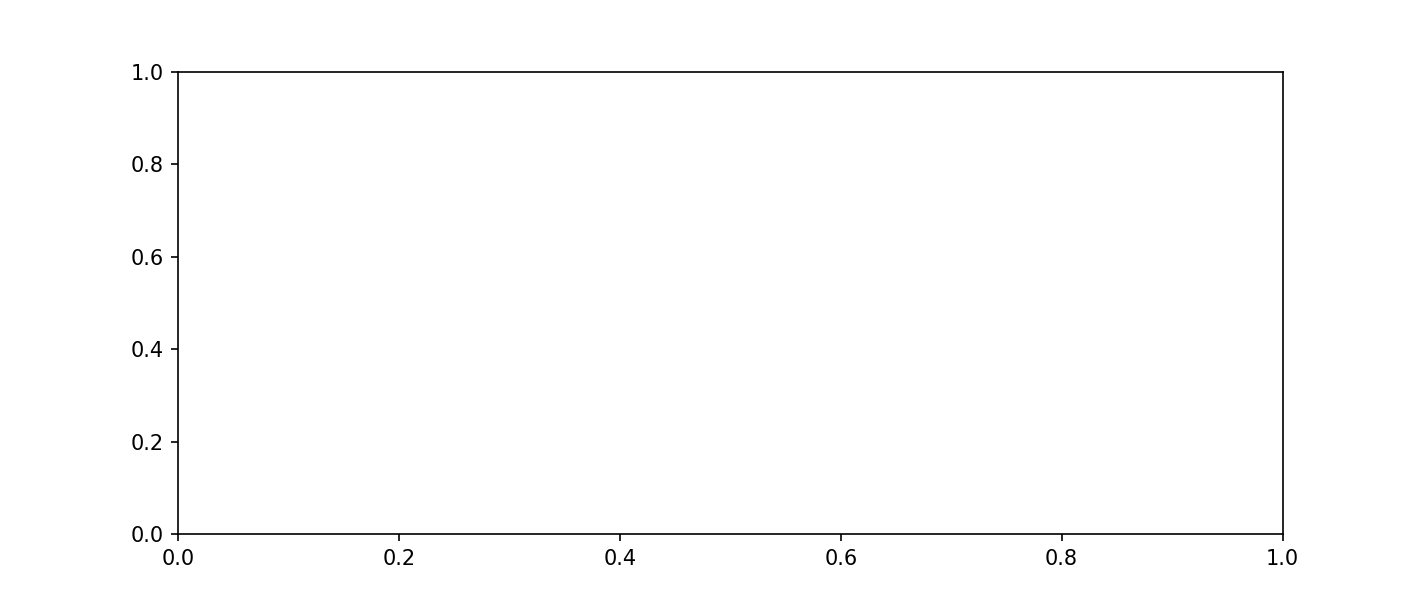

NameError: name 'fft_mean_x2' is not defined

In [42]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.semilogy(range(100), fft_mean,'.', label=str(gravity_freqs[j]))
# ax.semilogy(range(100), np.sqrt(np.abs(fft_mean_x))*x_scale,'.', label=str(gravity_freqs[j])+' Hz')
# [ax.semilogy(range(100), fft_mean_x2[:,j],'.', label=str(gravity_freqs[j])+' Hz') for j in [11,9,10]]
# [ax.semilogy(range(100), fft_mean_z2[:,j],'.', label=str(gravity_freqs[j])+' Hz') for j in [11,9,10]]
listt = [10]
[ax.semilogy(fft_mean_x2[10:,j], fft_mean_z2[10:,j],'.', label=str(gravity_freqs[j])+' Hz - 378') for j in listt]
[ax.semilogy(fft_mean_x2_376[:,j], fft_mean_z2_376[:,j],'.', label=str(gravity_freqs[j])+' Hz - 376') for j in listt]
[ax.semilogy(fft_mean_x2_373[:,j], fft_mean_z2_373[:,j],'.', label=str(gravity_freqs[j])+' Hz - 373') for j in listt]
ax.legend()

<IPython.core.display.Javascript object>


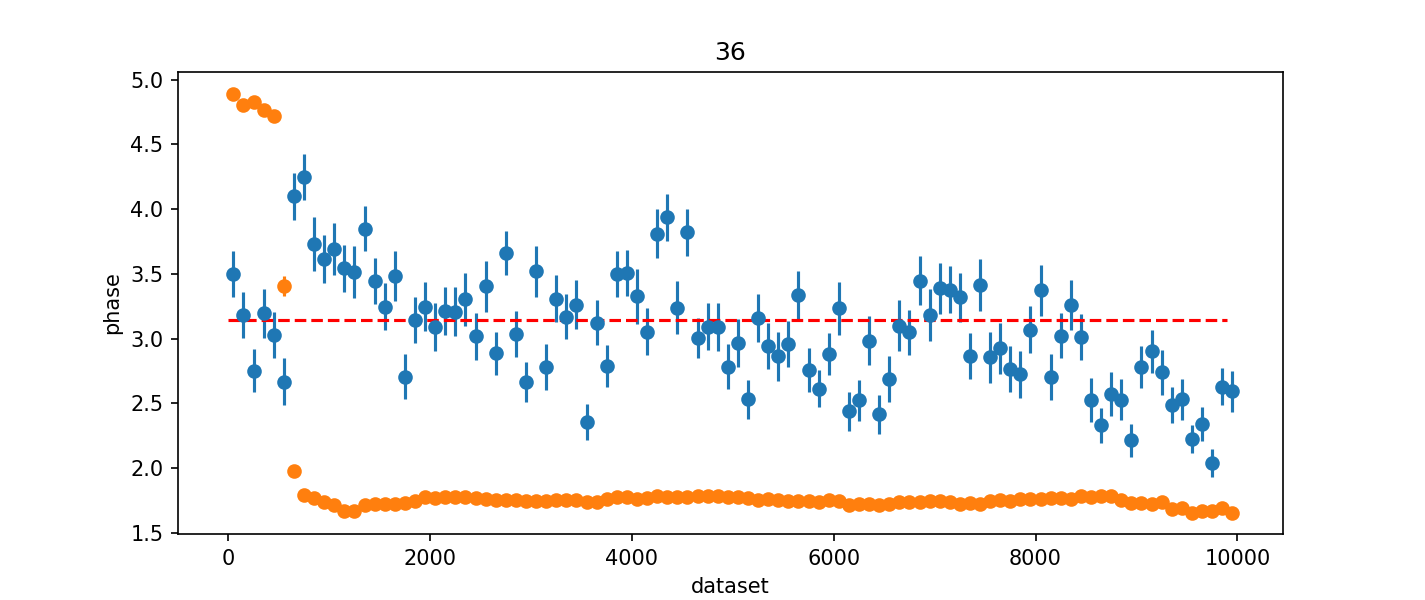

[Text(0, 0.5, 'phase'), Text(0.5, 0, 'dataset'), Text(0.5, 1.0, '36')]

In [278]:
j = 10
vec = phases_freqs_z[:,j,0]
phase_mean = [np.mean(vec[i*100:(i+1)*100]) for i in range(100)]
phase_std = [np.std(vec[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

vec = phases_freqs_x[:,j,0]
phase_mean_x = [np.mean(vec[i*100:(i+1)*100]) for i in range(100)]
phase_std_x = [np.std(vec[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

_, ax = plt.subplots(figsize=(9.5,4))
ax.errorbar(np.arange(0,10000,100)+50, phase_mean, yerr=phase_std, fmt='o')
ax.errorbar(np.arange(0,10000,100)+50, phase_mean_x, yerr=phase_std_x, fmt='o')
ax.plot(np.arange(0,10000,100), np.arange(0,10000,100)*0+np.pi, 'r--')
ax.set(xlabel='dataset', ylabel=r'phase', title=str(gravity_freqs[j]))

<IPython.core.display.Javascript object>


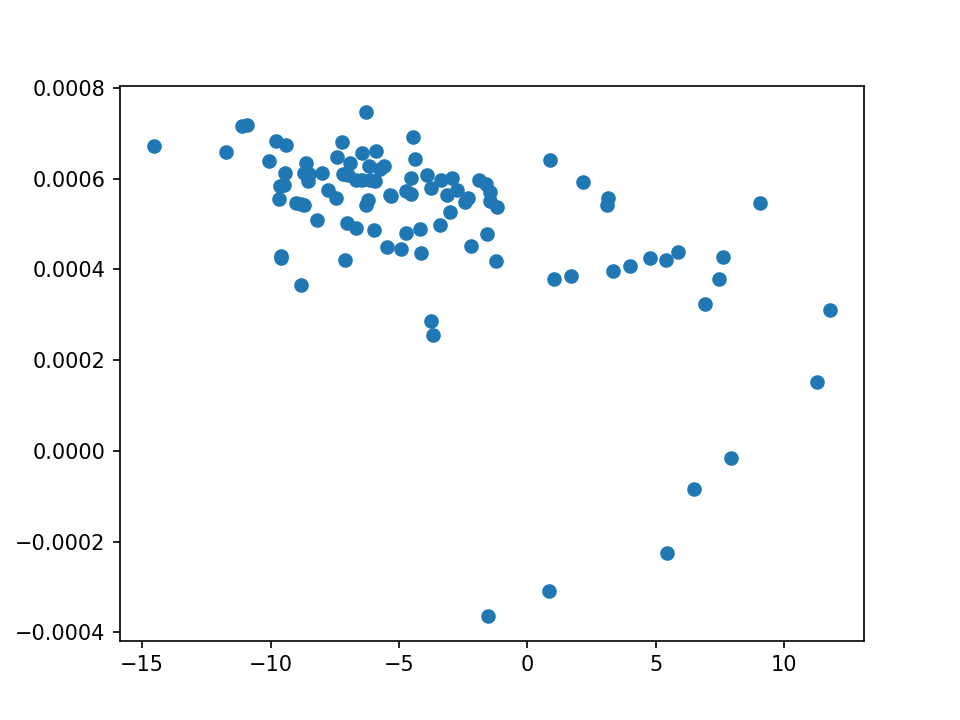

In [290]:
j = 8
vec = ffts_freqs_z[:,j,0]
fft_mean = [np.mean(vec[i*100:(i+1)*100]) for i in range(100)]
fft_std = [np.std(vec[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

vec = ffts_freqs_x[:,j,0]
fft_mean_x = [np.mean(vec[i*100:(i+1)*100]) for i in range(100)]
fft_std_x = [np.std(vec[i*100:(i+1)*100])/np.sqrt(100) for i in range(100)]

_,ax = plt.subplots()
ax.scatter(fft_mean, fft_mean_x)